# Objective

The project predicts if a person has an heart attack or not. 

# Data

The data was obtained from Kaggle competition data repository. Acess the data here <https://www.kaggle.com/datasets/enlightenmente/heart-attack-prediction>

# Skills

The following skills were employed here

- Programming (Python)
- Data Wrangling (Pandas and Numy)
- Data Visualization (ggplot2, seaborn)
- Machine Learning (Scikit learn)

In [1]:
# importing the data

import pandas as pd

Data = pd.read_csv("heart.csv")

In [2]:
# head of data

Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# description of data

Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# shape of data

Data.shape

(303, 14)

In [7]:
# separate the patients with heart attack and without heart attack

withattack = Data[Data.target == 1]
withattack.shape

(165, 14)

In [9]:
withoutattack = Data[Data.target == 0]
withoutattack.shape

(138, 14)

Text(0, 0.5, 'Counts')

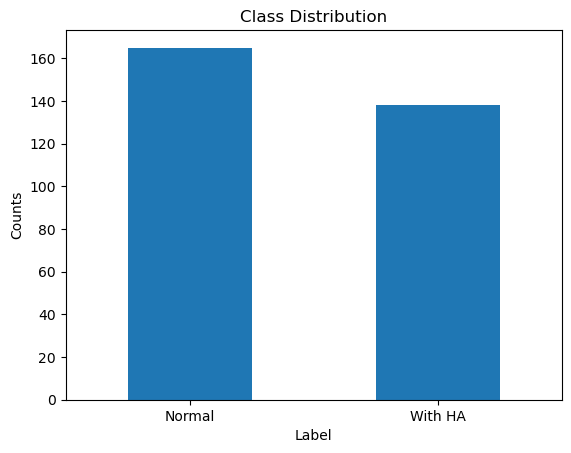

In [11]:
# visual plot

import matplotlib.pyplot as plt

class_counts = pd.value_counts(Data['target'], sort = True)
class_counts.plot(kind = "bar", rot = 0)
plt.title("Class Distribution")
plt.xticks(range(2),["Normal", "With HA"])
plt.xlabel("Label")
plt.ylabel("Counts")

In [13]:
# using ggplot2 syntax in python
from plotnine import *

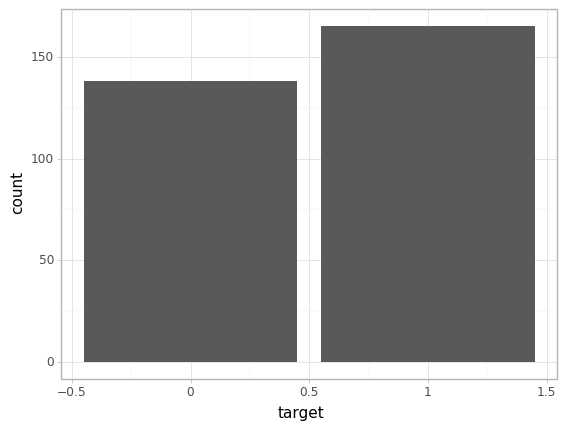

<ggplot: (137244410131)>

In [18]:
ggplot(Data, aes(x = 'target')) + geom_bar() + theme_light()

C:\Users\Mutua Sam\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.


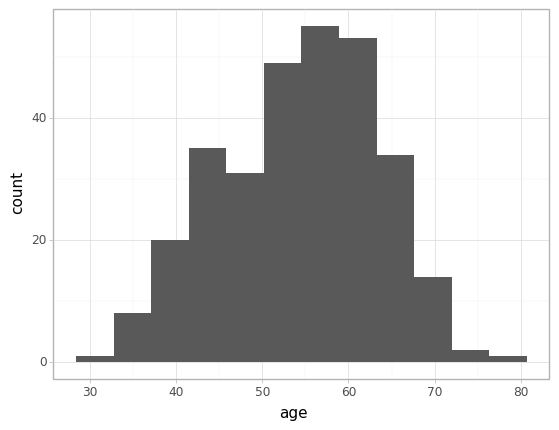

<ggplot: (137237604976)>

In [17]:
# histogram

ggplot(Data, aes(x = 'age')) + geom_histogram() + theme_light()

In [20]:
# equivalent of dplyr in python dplython

from dplython import *

In [21]:
Newdata = DplyFrame(Data)

In [25]:
Newdata['target'] = pd.Categorical(Newdata.target)

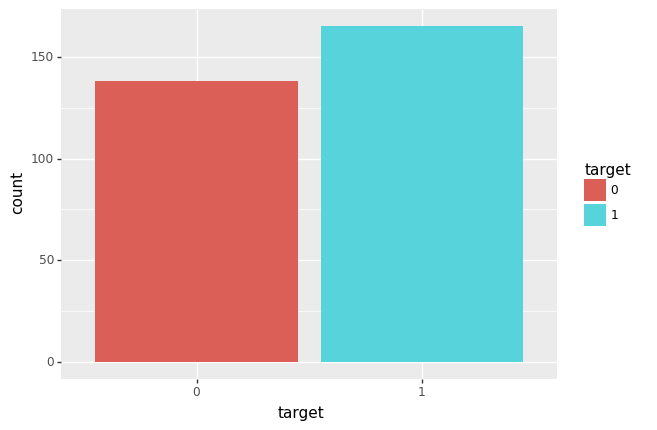

<ggplot: (137244601116)>

In [30]:
ggplot(Newdata, aes(x= 'target', fill = 'target')) + geom_bar()

In [31]:
# machine learning model - simple logistic regression model

import numpy as np

import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix

from sklearn.model_selection import KFold

C:\Users\Mutua Sam\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\Mutua Sam\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.


In [32]:
# splitting data into test and train set

train_data, test_data = train_test_split(Data,test_size = 0.2, random_state = 2020)

In [33]:
# split train into validation and train set

train_data, validate_data = train_test_split(train_data, test_size = 0.25, random_state = 2020)

In [34]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
114,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [36]:
validate_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [38]:
# settng the target
y_train = np.array(train_data["target"])
y_test = np.array(test_data["target"])
y_validate = np.array(validate_data["target"])

In [39]:
# dropping the target variable

train_data = train_data.drop("target", axis = 1)
test_data = test_data.drop("target", axis = 1)
validate_data = validate_data.drop("target", axis = 1)

In [40]:
#standardizing the data - feature scaling 
scaler = StandardScaler()
scaler.fit(Data.drop('target', axis = 1))
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
validate_data = scaler.transform(validate_data)

In [41]:
# model training - logistic regression

sk_model = LogisticRegression(random_state = None, max_iter = 400, solver = 'newton-cg').fit(train_data,y_train)

In [43]:
# model evaluation

eval_acc = sk_model.score(test_data, y_test)
eval_acc

0.819672131147541

In [45]:
# scores - auc and accuracy

preds = sk_model.predict(test_data)
auc_score = roc_auc_score(y_test,preds)
auc_score

0.8131868131868132

C:\Users\Mutua Sam\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


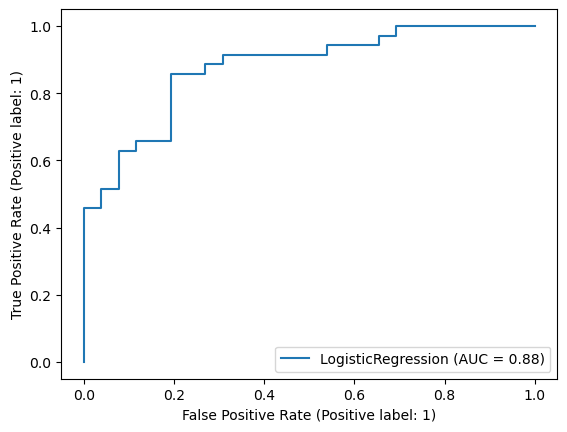

In [46]:
# ROC Curve

roc_plot = plot_roc_curve(sk_model,test_data, y_test)

In [47]:
# confusion matrix

conf_matrix = confusion_matrix(y_test, preds)
conf_matrix

array([[20,  6],
       [ 5, 30]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

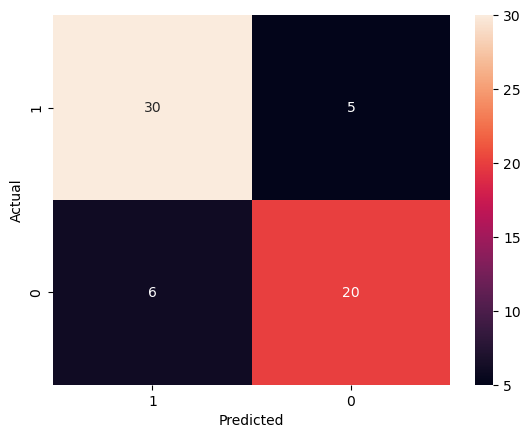

In [48]:
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [56]:
# Model validation

# weights to iterate

anomaly_weights = [1, 5, 10, 15]

num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=2020)

logs = []
for f in range(len(anomaly_weights)):
    fold =1
    accuracies = []
    auc_scores = []
    fold = 1   
    for train, test in kfold.split(validate_data, y_validate):
        weight = anomaly_weights[f]
        class_weights= {
            0:1,
            1:weight
        }
        sk_model = LogisticRegression(random_state=None,max_iter=400,solver='newton-cg',class_weight=class_weights).fit(validate_data[train],y_validate[train])

for h in range(40): print('-', end="")
print(f"\nfold {fold}\nAnomaly Weight:{weight}")
eval_acc = sk_model.score(validate_data[test],y_validate[test])  
preds = sk_model.predict(validate_data[test])
try:
        auc_score = roc_auc_score(y_validate[test], preds)
except:
    auc_score = -1
print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))
accuracies.append(eval_acc)
auc_scores.append(auc_score)
log = [sk_model, validate_data[test], y_validate[test], preds]
logs.append(log)
fold = fold + 1
print("\nAverages: ")
print("Accuracy: ", np.mean(accuracies))
print("AUC: ", np.mean(auc_scores))
print("Best: ")
print("Accuracy: ", np.max(accuracies))
print("AUC: ", np.max(auc_scores))


----------------------------------------
fold 1
Anomaly Weight:15
AUC: 0.8333333333333334
eval_acc: 0.75

Averages: 
Accuracy:  0.75
AUC:  0.8333333333333334
Best: 
Accuracy:  0.75
AUC:  0.8333333333333334


# The model has been trained, tested and validated using sklearn library in python jupyter notebook. 